In [1]:
import fourier
import data_from_input
#import integration
#import metaprocessing
import matplotlib.pyplot as plt
import numpy as np
from source import source

In [2]:
# Set the font family and size to use for Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 25

In [3]:
path = r"./midIR/data/source/n_1.1"

In [4]:
delta_t, delta_x, a_rel, n, focal_spot_fwhm = data_from_input.parameters_from_input(path)

In [5]:
bz, x_array = data_from_input.reparse(path, "bz2dxy", a_rel, delta_x)
by = data_from_input.reparse(path, "by2dxy", a_rel, 0)
ey = data_from_input.reparse(path, "ey2dxy", a_rel, 0)
ez = data_from_input.reparse(path, "ez2dxy", a_rel, 0)
n_e = data_from_input.reparse(path, "electron_px", n, 0)

# Source

## Code

In [6]:
by_r = (ez+by)/2
by_i = (-ez+by)/2

bz_r = (-ey+bz)/2
bz_i = (ey+bz)/2

In [7]:
mask_2d = np.where((np.sqrt(bz_r**2 + by_r**2) > 5e-3), 1, 0)
mask_ne = np.where(n_e > 9e-1, 0.99, 0.01)
range1 = (3, 50)

In [8]:
filtered_bz_r1 = source(bz_i, bz_r, range1)
filtered_by_r1 = source(by_i, by_r, range1)
t = np.linspace(0,400, filtered_by_r1.shape[0])

In [9]:
forier_bz_i, forier_bz_r, max_forier_basez, omegaz, flambdaz, lforier_bz_i, lforier_bz_r = fourier.fourier_of_field(bz_i[100,:], bz_r[300,:], 0.8, True)
spec_filtered = fourier.spec_filter(lforier_bz_r, flambdaz, range1, "tophat")

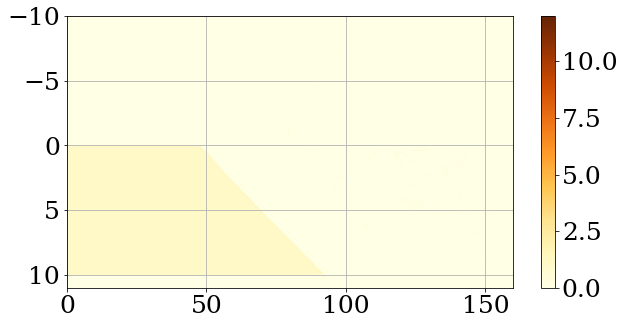

In [10]:
plt.figure(figsize = ((10,5)))
plt.imshow(n_e.T, vmax = 12, vmin = 0, cmap = "YlOrBr", extent = (0, 400, 30, -30), aspect =  "auto")
plt.colorbar()
plt.axis([0, 160, 11, -10])
plt.grid()

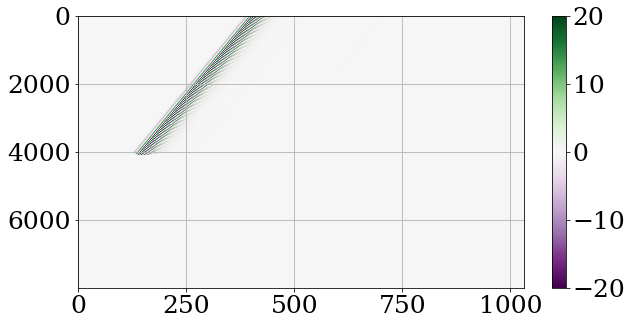

In [43]:
plt.figure(figsize = ((10,5)))
plt.imshow(bz_r.T, aspect = "auto", cmap = "PRGn", vmin = 20, vmax = -20)
plt.colorbar()
plt.grid()

## Result

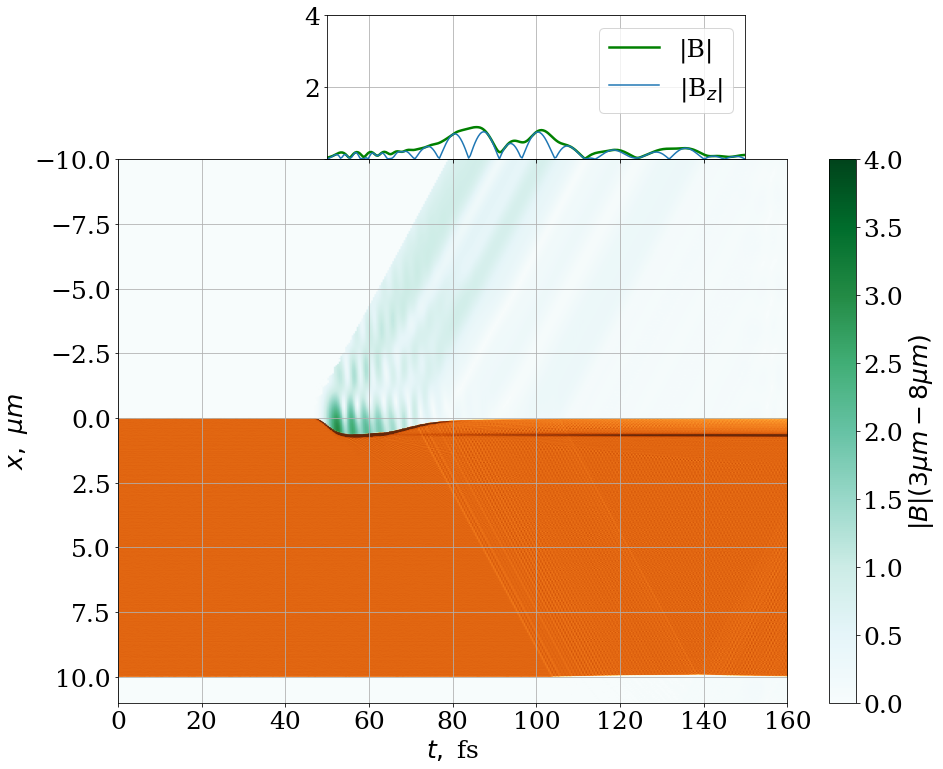

In [62]:
fig = plt.figure(figsize = (15,10))

imshow_kwargs_field1["vmax"] = 4

ax1 = plt.axes()  # standard axes
imag1 = ax1.imshow((np.sqrt((filtered_by_r1)**2 + (filtered_bz_r1)**2)*mask_2d).T, vmax = 4, vmin = 0, cmap = "BuGn", extent = (0, 400, 30, -30), aspect = "auto")
cbar1 = fig.colorbar(imag1)
cbar1.set_label(r'$|B|(3\mu m-8\mu m)$')
imag2 = ax1.imshow(n_e.T, alpha = mask_ne.T, vmax = 15, vmin = 0, cmap = "YlOrBr", extent = (0, 400, 30, -30), aspect =  "auto")

ax1.axis([0, 160, 11, -10])

plt.xlabel("$t,$ fs")
plt.ylabel("$x,$ $\mu m$")
ax1.grid()

ax2 = plt.axes([0.319, 0.88, 0.387, 0.2])
ax2.plot(t, ((np.sqrt((filtered_by_r1)**2 + (filtered_bz_r1)**2)))[:,2666], linewidth = 2.5, c = "g", label = "|B|")
ax2.plot(t, abs(filtered_bz_r1[:,2666]), linewidth = 1.5, label = "|B$_z$|")
ax2.set_xticks(np.arange(0,200,20))
ax2.set_yticks(np.arange(-4,5,2))
ax2.axis([50, 150,0.0,4])
ax2.set_xticklabels([])
ax2.set_yticklabels(["","","",2,4])
ax2.legend()
ax2.grid()



# Spectrum

## Code

In [21]:
forier_bz_i, forier_bz_r, max_forier_basez, omegaz, flambdaz, lforier_bz_i, lforier_bz_r = fourier.fourier_of_field(bz_i[100,:], bz_r[300,:], 0.8, True)
spec_filtered = fourier.spec_filter(lforier_bz_r, flambdaz, range1, "tophat")

## Result

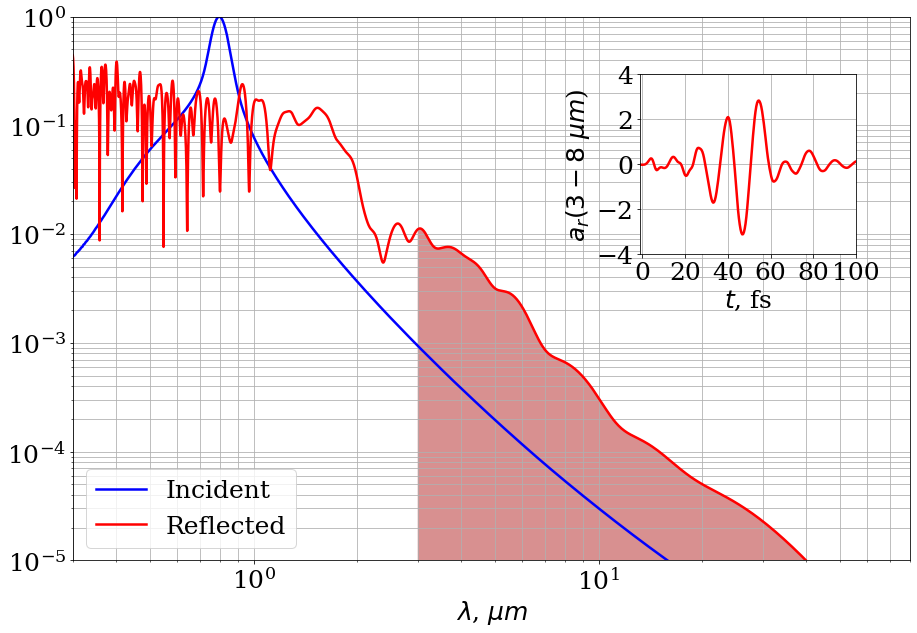

In [24]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.axes()  # standard axes
plt.xlabel(r"$\lambda$, $\mu m$", fontsize=25)
plt.fill_between(flambdaz,abs(spec_filtered), 1e-8, color=(0.69803922, 0.13333333, 0.13333333, 0.5))
ax2 = plt.axes([0.65, 0.55, 0.20, 0.25])

ax1.loglog(flambdaz ,abs(lforier_bz_i), label = r'Incident', linewidth = 2.5, c = "b")
ax1.loglog(flambdaz ,abs(lforier_bz_r), label = r'Reflected', linewidth = 2.5, c = "r")
ax1.legend(loc = "lower left")
ax1.axis((3e-1,8e+1,1e-5,1))
ax2.plot(t-50.3, filtered_bz_r1[:,2666], label = r'$B_z(3\mu m-8\mu m)$', linewidth = 2.5, c = "r")
ax2.set_xticks(np.arange(0,110,20))
ax2.set_yticks(np.arange(-4,5,2))
ax2.axis([-1, 100,-4,4])
plt.xlabel(r"$t$, fs", fontsize=25)
plt.ylabel(r"$a_r(3-8$ $\mu m$)", fontsize=25)
ax1.grid(True, which="both")
ax2.grid(True, which="both")
plt.show()